In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
# Check missing values
print(df.isnull().sum())

# Option 1: Fill with mean/median
df.fillna(df.mean(), inplace=True)

# Option 2: Drop rows with missing values
# df.dropna(inplace=True)


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [4]:
X = df.drop("price_range", axis = 1)
y = df["price_range"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X_train, y_train)

SVC(C=1)

In [10]:
y_pred = model.predict(X_test)

In [11]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nConfusion matrix: \n", confusion_matrix(y_test, y_pred))
print("\nClassification report: \n", classification_report(y_test, y_pred))

Accuracy:  0.965

Confusion matrix: 
 [[103   2   0   0]
 [  1  90   0   0]
 [  0   3  87   2]
 [  0   0   6 106]]

Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       105
           1       0.95      0.99      0.97        91
           2       0.94      0.95      0.94        92
           3       0.98      0.95      0.96       112

    accuracy                           0.96       400
   macro avg       0.96      0.97      0.96       400
weighted avg       0.97      0.96      0.97       400



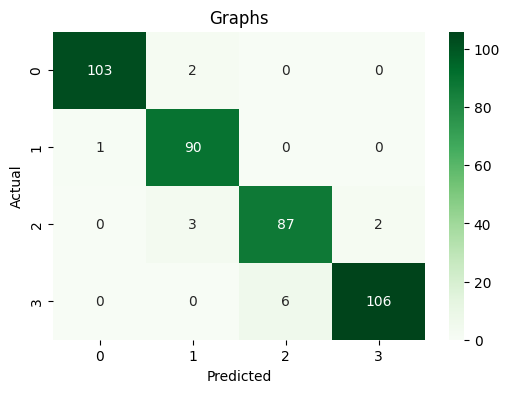

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt = 'd', cmap = 'Greens')
plt.title("Graphs")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()